# Assignment 3 - Principal Component Analysis
## Problem Statement 1:
Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).

>### Business Objective

The goal is to analyze a wine dataset using clustering techniques to identify natural groupings of wines based on their features. These clusters can aid in product segmentation for targeted marketing, ensure quality control by spotting inconsistencies, offer consumer insights for better alignment with preferences, and guide product development by focusing on features linked to top-rated wines

>### Constraints

**Dimensionality of the Data:** Wine datasets often have numerous features, making the analysis complex and resource-intensive. To simplify this, Principal Component Analysis (PCA) will reduce dimensionality while preserving essential information. However, there is a risk of losing valuable details during this process.

**Optimal Number of Clusters:** Finding the right number of clusters is key—too few may overlook differences, and too many may overfit. Methods like the Elbow method will help.

**Feature Relevance:** Irrelevant features (e.g., IDs) will be removed to improve clustering accuracy.

**Scaling and Normalization:**Data will be scaled to avoid features with larger units dominating the results.


In [1]:
import pandas as pd
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [3]:
#count null values
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [4]:
#checking for outliers
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

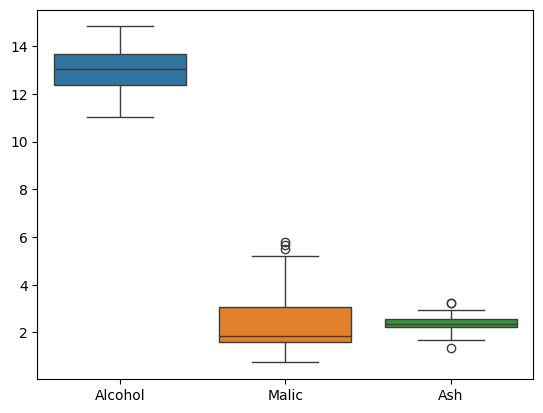

In [5]:
import seaborn as sns
sns.boxplot(df[['Alcohol', 'Malic', 'Ash']])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

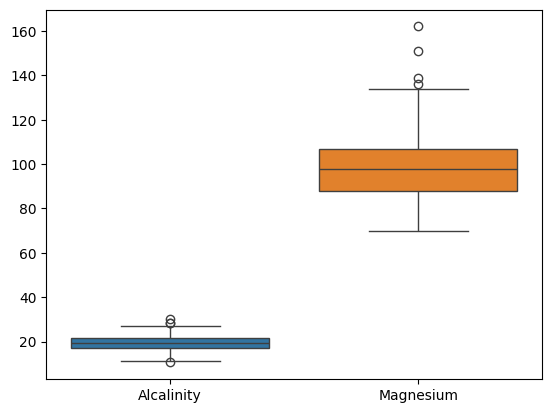

In [6]:
sns.boxplot(df[['Alcalinity', 'Magnesium']])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

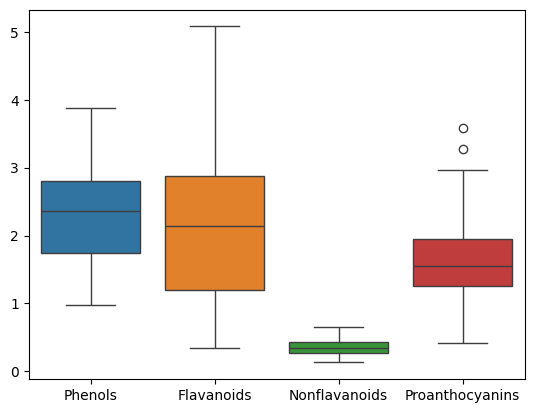

In [7]:
sns.boxplot(df[['Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins']])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

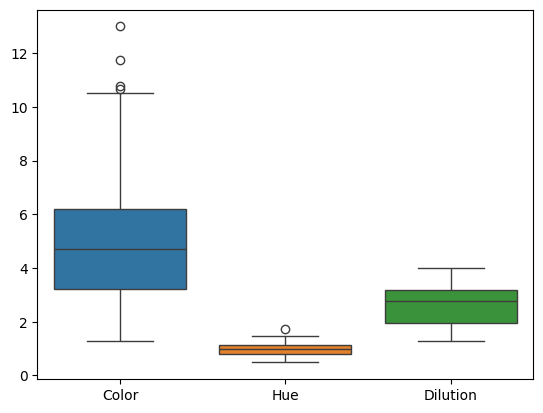

In [8]:
sns.boxplot(df[['Color', 'Hue', 'Dilution']])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

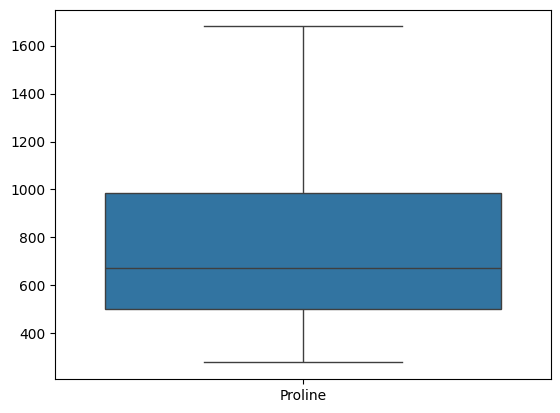

In [9]:
sns.boxplot(df[['Proline']])

In [10]:
columns_with_outliers=['Malic', 'Ash', 'Alcalinity', 'Magnesium','Proanthocyanins', 'Color', 'Hue']

In [11]:
#Applying log tansformation
import numpy as np
def handle_outliers(df, columns):
    for col in columns:
        #Log transformation for skewed data
        df[col] = df[col].apply(lambda x: np.log1p(x) if x > 0 else 0)
    return df

df_cleaned = handle_outliers(df, columns_with_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

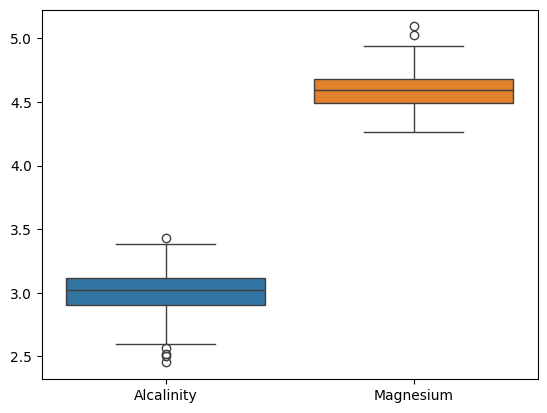

In [12]:
sns.boxplot(df_cleaned[['Alcalinity', 'Magnesium']])

In [13]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df_cleaned = remove_outliers(df, columns_with_outliers)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

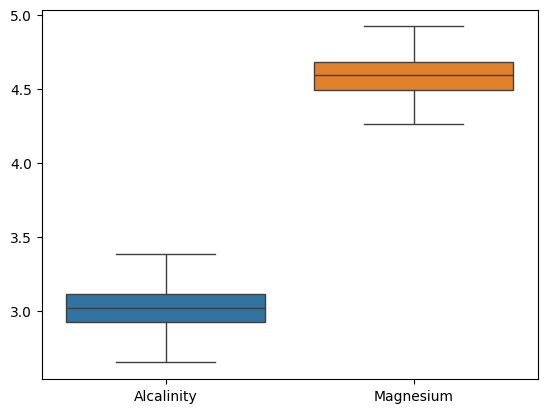

In [14]:
sns.boxplot(df_cleaned[['Alcalinity', 'Magnesium']])

In [15]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_cleaned)

In [16]:
df_scaled=pd.DataFrame(df_scaled, columns=df_cleaned.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

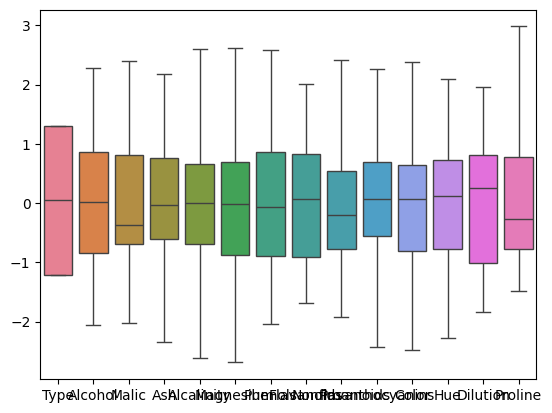

In [17]:
sns.boxplot(df_scaled)

## Hierarchical clustering on normalized data

In [18]:
#perform clustering based on alcohol content
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [19]:
#hierarchical clustering
hc=AgglomerativeClustering(n_clusters=3)
y_hc=hc.fit_predict(df_scaled)

In [20]:
#create dataframes for different clusters
df_cluster1=df_cleaned[y_hc==0]
df_cluster2=df_cleaned[y_hc==1]
df_cluster3=df_cleaned[y_hc==2]

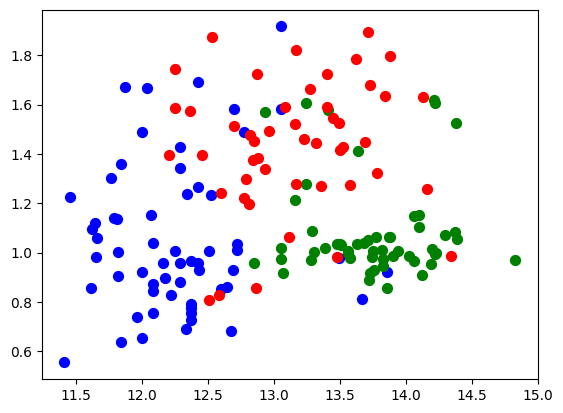

In [21]:
plt.scatter(df_cluster1['Alcohol'], df_cluster1['Malic'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Alcohol'], df_cluster2['Malic'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['Alcohol'], df_cluster3['Malic'], s=50, c='red', label='Cluster 3')

## KMeans clustering on normalized data

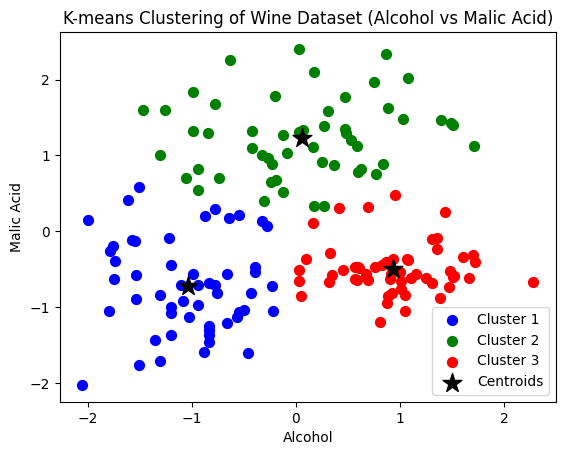

In [22]:
# Perform K-means clustering based on alcohol and malic acid
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['Alcohol', 'Malic']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['Alcohol'], df_cluster1['Malic'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Alcohol'], df_cluster2['Malic'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['Alcohol'], df_cluster3['Malic'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering of Wine Dataset (Alcohol vs Malic Acid)')
plt.legend()
plt.show()


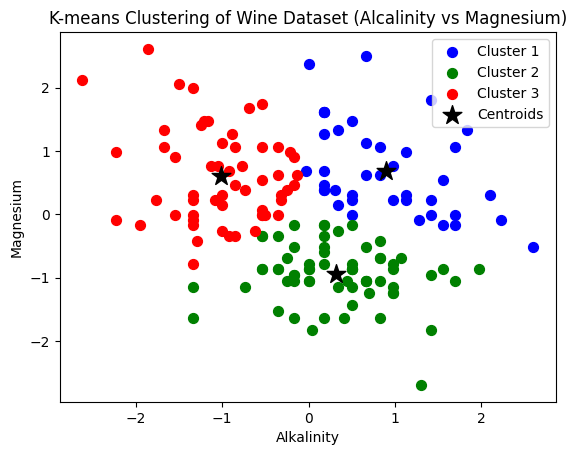

In [23]:
# Perform K-means clustering based on alcohol and malic acid
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['Alcalinity', 'Magnesium']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['Alcalinity'], df_cluster1['Magnesium'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Alcalinity'], df_cluster2['Magnesium'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['Alcalinity'], df_cluster3['Magnesium'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Alkalinity')
plt.ylabel('Magnesium')
plt.title('K-means Clustering of Wine Dataset (Alcalinity vs Magnesium)')
plt.legend()
plt.show()


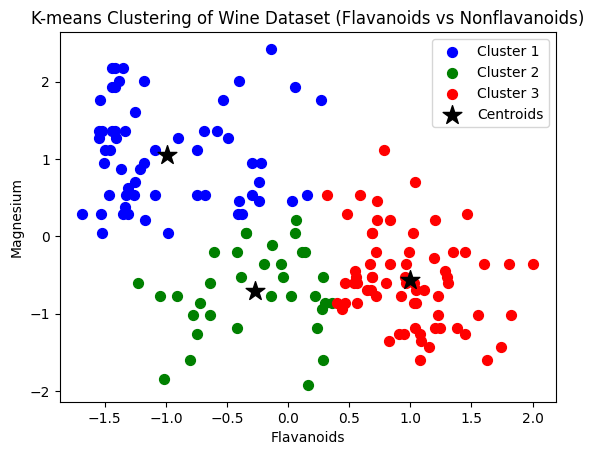

In [24]:
# Perform K-means clustering based on alcohol and malic acid
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['Flavanoids', 'Nonflavanoids']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['Flavanoids'], df_cluster1['Nonflavanoids'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Flavanoids'], df_cluster2['Nonflavanoids'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['Flavanoids'], df_cluster3['Nonflavanoids'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Flavanoids')
plt.ylabel('Magnesium')
plt.title('K-means Clustering of Wine Dataset (Flavanoids vs Nonflavanoids)')
plt.legend()
plt.show()


In [31]:
#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(df_scaled, y_kmeans)
print(sil_score)

0.12112049273648878


# Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)
# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# Print the explained variance ratio for each component
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

Explained Variance Ratio: [0.41922353 0.1962953  0.08763326]


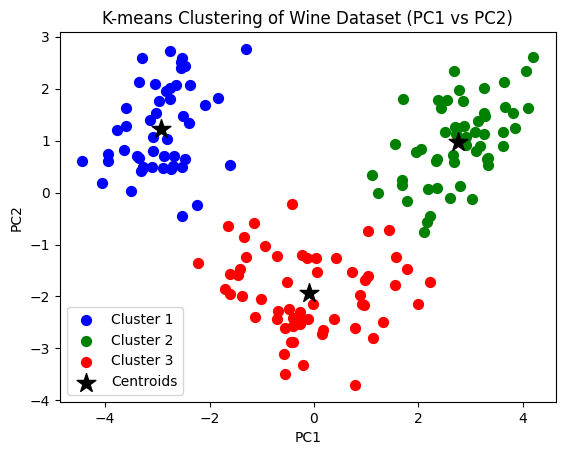

In [26]:
#perform kmeans clustering on PC1 and PC2
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC1', 'PC2']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC1'], df_cluster1['PC2'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC1'], df_cluster2['PC2'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['PC1'], df_cluster3['PC2'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering of Wine Dataset (PC1 vs PC2)')
plt.legend()
plt.show()


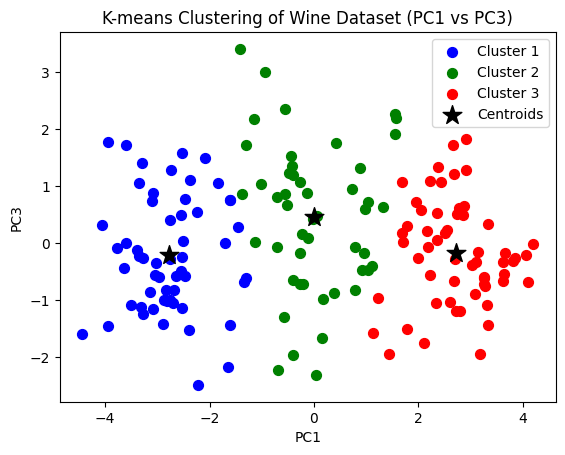

In [27]:
#perform kmeans clustering on PC1 and PC3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC1', 'PC3']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC1'], df_cluster1['PC3'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC1'], df_cluster2['PC3'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['PC1'], df_cluster3['PC3'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('K-means Clustering of Wine Dataset (PC1 vs PC3)')
plt.legend()
plt.show()


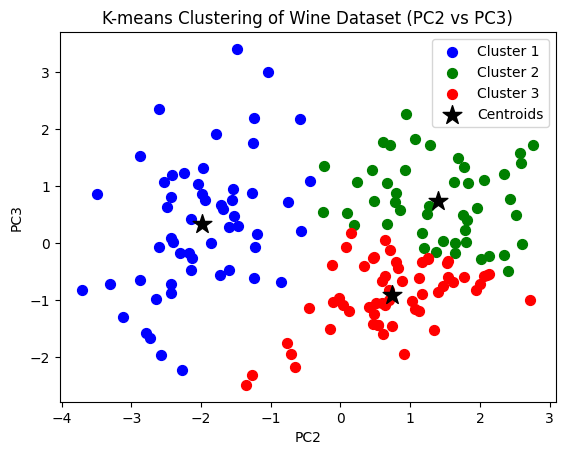

In [28]:
#perform kmeans clustering on PC2 and PC3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC2', 'PC3']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC2'], df_cluster1['PC3'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC2'], df_cluster2['PC3'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['PC2'], df_cluster3['PC3'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('K-means Clustering of Wine Dataset (PC2 vs PC3)')
plt.legend()
plt.show()


In [32]:
#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(principal_df, y_kmeans)
print(sil_score)

0.20841566575318546


### Conclusion
- Clustering after the PCA led to a better silhoutte score, meaning the clustering after PCA led to more distinct clusters and it effectively simplified the dataset while preserving the important information for clustering.
- Silhoutte score before PCA= 0.12112049273648878
- Silhoutte score after PCA= 0.20841566575318546
- The clusters on the principal components appear to be more distinct than the ones on the original data
- The dataset consists of the original chemical properties (e.g., alcohol content, acidity). Clustering directly on this data might result in clusters, but some features may dominate the results due to different scales or high correlations between variables (e.g., Alcohol and Phenols). Therefore PCA needed to be performed on the dataset.